# COMP5318 Assignment 1: Classification

### Group number: A1part2 6  , SID1: 520080414   

In [113]:
# Import all libraries
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re, string

In [114]:
# Load dataset
df = pd.read_csv('training.300000.processed.noemoticon.csv')

print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (300000, 6)


,sentiment,id,date,query,username,text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [115]:
# Pre-process dataset

df_tweet = df[['sentiment', 'text']]
df_tweet['sentiment'] = df_tweet['sentiment'].replace(4, 1)

positive = df_tweet[df_tweet['sentiment'] == 1]
negative = df_tweet[df_tweet['sentiment'] == 0]

#Only retaining some data from each output group
# positive = positive.iloc[:16000]
# negative = negative.iloc[:16000]

df_tweet = pd.concat([positive, negative])
len(df_tweet)

C:\Users\FU\AppData\Local\Temp\ipykernel_4204\2667038167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['sentiment'] = df_tweet['sentiment'].replace(4, 1)


300000

In [116]:
# nltk.download('all')

In [117]:
#Data cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # make text lowercase
    text = text.lower()

    # removing usernames
    text = re.sub('@[^\s]+', '', text)

    # removing text in square brackets, links and words containing numbers
    text = re.sub('((https?://[^\s]+)|(www\.[^\s]+))','',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # removing punctuation
    text = text.translate(str.maketrans('','',string.punctuation))

    # tokenization
    tokens = word_tokenize(text)

    # suppression of stop words and lemmatization
    word_net = WordNetLemmatizer()
    final_words = []
    for token in tokens:
      # suppression of stop words
      if token not in stop_words and len(token) > 1:
        lemm = word_net.lemmatize(token)
        final_words.append(lemm)
    return ' '.join(final_words)

In [118]:
start_time = time()
df_tweet['cleaned_text'] = df_tweet['text'].apply(lambda x: clean_text(x))
print('Cleaning time:', time() - start_time)
df_tweet.head()

Cleaning time: 29.455032348632812


,sentiment,text,cleaned_text
6,1,on lunch....dj should come eat with me,lunchdj come eat
9,1,@mrstessyman thank you glad you like it! There...,thank glad like product review bit site enjoy ...
10,1,@PerezHilton Zach makes me pee sitting down! A...,zach make pee sitting im grown gay man
11,1,to sum up my day in one word ......... kackered!,sum day one word kackered
12,1,@k9wkj Great minds think alike,great mind think alike


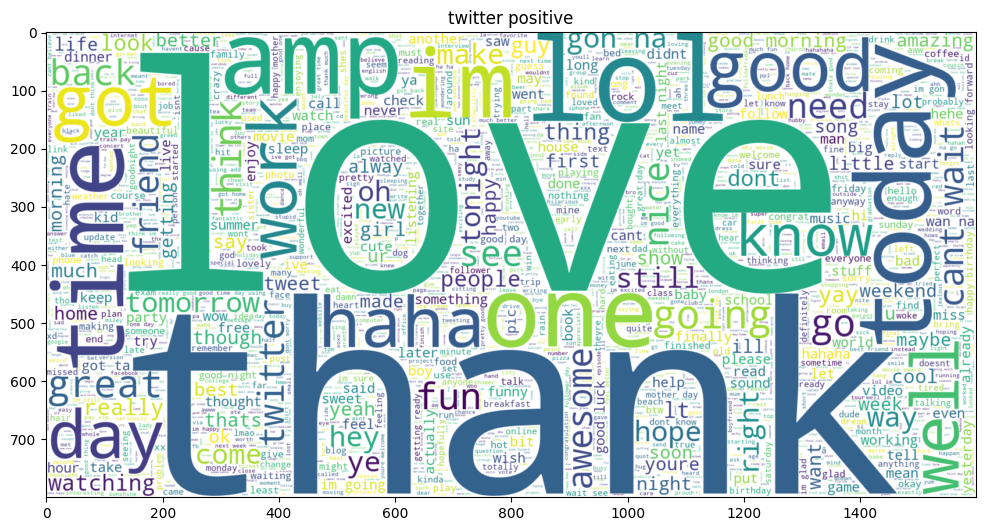

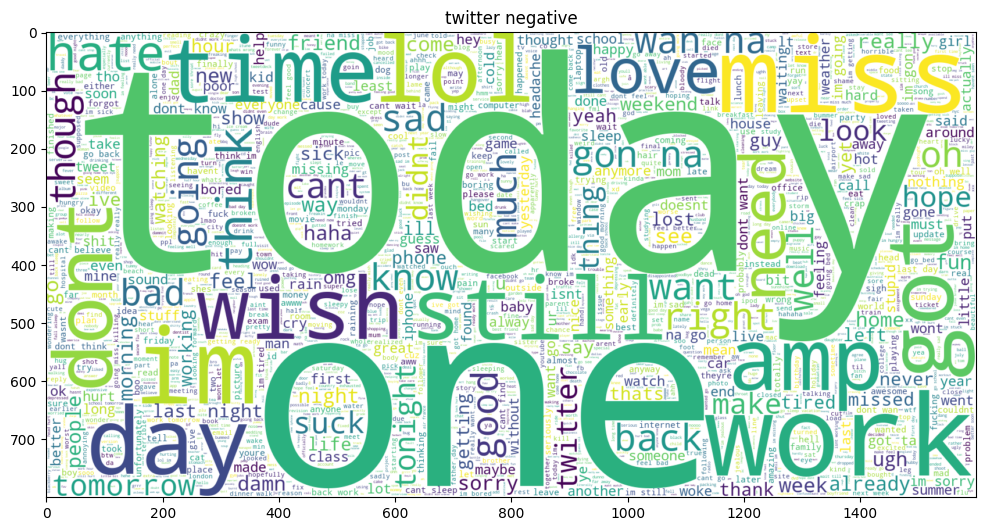

In [119]:
#Generate Word Cloud and separating out positive and negative words

def word_cloud_draw(sentiments, colors,titles):
    plt.figure(figsize=(12, 12))
    word_cloud = WordCloud(max_words = 2000, width = 1600, height = 800, background_color = colors).generate(" ".join(df_tweet[df_tweet.sentiment == sentiments].cleaned_text))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(titles)

color = 'white'
title_positive = 'twitter positive'
title_negative = 'twitter negative'

word_cloud_draw(1, color, title_positive)
word_cloud_draw(0, color, title_negative)

In [120]:
#Splitting dataset in train and test

#split data as 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(df_tweet['cleaned_text'].values, df_tweet['sentiment'].values, test_size=0.2, random_state=1)
print("x_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", X_test.shape)
print("y_test : ", y_test.shape)

x_train :  (240000,)
y_train :  (240000,)
x_test :  (60000,)
y_test :  (60000,)


In [121]:
#Vectorization with CountVectorizer and classification

count_vectorizer = CountVectorizer()

count_vec_train = count_vectorizer.fit_transform(X_train)
count_vec_test = count_vectorizer.transform(X_test)

print("count_train : ", count_vec_train.shape)
print("count_test : ", count_vec_test.shape)

count_train :  (240000, 108668)
count_test :  (60000, 108668)


In [122]:
#Vectorization with Tfidf (Term Frequency - Inverse Document)

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

print("count_train : ", tfidf_train.shape)
print("count_test : ", tfidf_test.shape)

count_train :  (240000, 108668)
count_test :  (60000, 108668)


In [123]:
# Classification with Random Forest
def random_forest_classifier(train_data, test_data):
    np.random.seed(0)

    random_forest = RandomForestClassifier()
    random_forest = random_forest.fit(train_data, y_train)

    y_pred = random_forest.predict(test_data)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [124]:
#Classification using Logistic Regression
def logistic_regression(train_data, test_data):
    np.random.seed(0)

    logistic = LogisticRegression(max_iter=100, solver='liblinear')
    logistic = logistic.fit(train_data, y_train)

    y_pred = logistic.predict(test_data)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [125]:
# Classification with Naive Bayes
def naive_bayes(train_data, test_data):
    np.random.seed(0)

    naive_bayes = MultinomialNB()
    naive_bayes = naive_bayes.fit(train_data, y_train)

    y_pred = naive_bayes.predict(test_data)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [126]:
# Classification with Decision Tree
def decision_tree(train_data, test_data):
    np.random.seed(0)

    decision_tree = DecisionTreeClassifier()
    decision_tree = decision_tree.fit(train_data, y_train)

    y_pred = decision_tree.predict(test_data)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, confusion, precision, recall

In [127]:
print("classification with CountVectorizer")
start_time = time()

rf_accuracy, rf_confusion, rf_precision, rf_recall = random_forest_classifier(count_vec_train, count_vec_test)
print('\nrandom forest')
print(f'Accuracy: {round(rf_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',rf_confusion)
print(f'Precision: {round(rf_precision*100,2)}%')
print(f'Recall: {round(rf_recall*100,2)}%')


logistic_accuracy, logistic_confusion, logistic_precision, logistic_recall = logistic_regression(count_vec_train, count_vec_test)
print('\nlogistic regression')
print(f'Accuracy: {round(logistic_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',logistic_confusion)
print(f'Precision: {round(logistic_precision*100,2)}%')
print(f'Recall: {round(logistic_recall*100,2)}%')


nb_accuracy, nb_confusion, nb_precision, nb_recall = naive_bayes(count_vec_train, count_vec_test)
print('\nnaive bayes')
print(f'Accuracy: {round(nb_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',nb_confusion)
print(f'Precision: {round(nb_precision*100,2)}%')
print(f'Recall: {round(nb_recall*100,2)}%')


dt_accuracy, dt_confusion, dt_precision, dt_recall = decision_tree(count_vec_train, count_vec_test)
print('\nDecision Tree')
print(f'Accuracy: {round(dt_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',dt_confusion)
print(f'Precision: {round(dt_precision*100,2)}%')
print(f'Recall: {round(dt_recall*100,2)}%')

print('\nCPU Time:', time() - start_time)

classification with CountVectorizer

random forest
Accuracy: 75.65%
Confusion Matrix:
 [[22674  7171]
 [ 7437 22718]]
Precision: 76.01%
Recall: 75.34%

logistic regression
Accuracy: 76.87%
Confusion Matrix:
 [[22128  7717]
 [ 6163 23992]]
Precision: 75.66%
Recall: 79.56%

naive bayes
Accuracy: 76.03%
Confusion Matrix:
 [[23088  6757]
 [ 7627 22528]]
Precision: 76.93%
Recall: 74.71%

Decision Tree
Accuracy: 70.18%
Confusion Matrix:
 [[21002  8843]
 [ 9048 21107]]
Precision: 70.47%
Recall: 70.0%

CPU Time: 4605.4628784656525


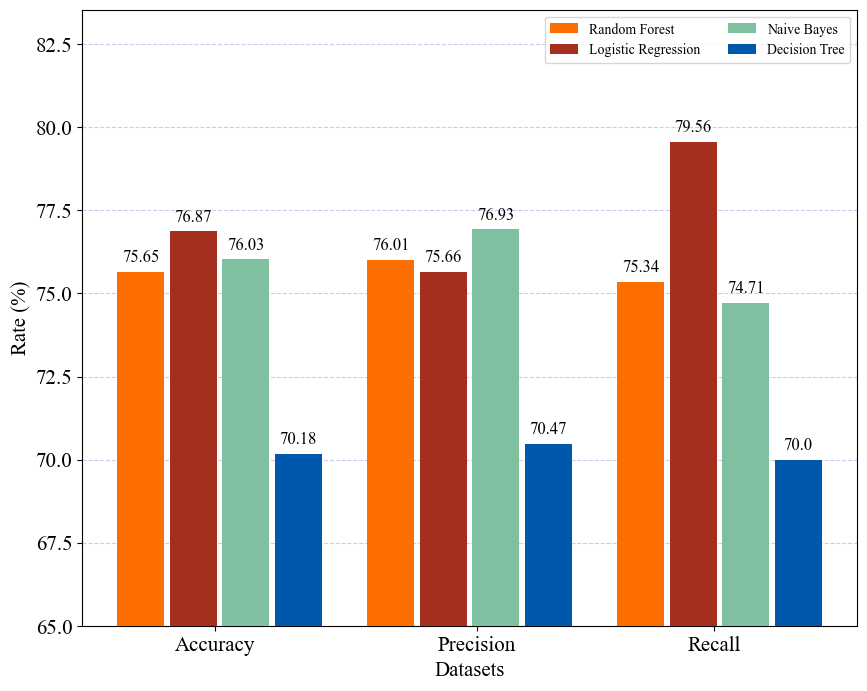

In [128]:
y1 = [round(rf_accuracy*100,2), round(rf_precision*100,2), round(rf_recall*100,2)]
y2 = [round(logistic_accuracy*100,2), round(logistic_precision*100,2), round(logistic_recall*100,2)]
y3 = [round(nb_accuracy*100,2), round(nb_precision*100,2), round(nb_recall*100,2)]
y4 = [round(dt_accuracy*100,2), round(dt_precision*100,2), round(dt_recall*100,2)]

x = ['Accuracy', 'Precision', 'Recall']
x_len = np.arange(len(x))
total_width, n = 1.0, 3
width = 0.21
xticks = x_len - (total_width - width) / 2
plt.figure(figsize=(10, 8))

ax = plt.axes()
plt.grid(axis="y", c='#d2c9eb', linestyle = '--',zorder=0)
plt.bar(xticks, y1, width=0.9*width, label="Random Forest", color="#fd6e00",edgecolor='black',linewidth = 0,  zorder=10)
plt.bar(xticks + width, y2, width=0.9*width, label="Logistic Regression", color="#a42f1f",edgecolor='black',linewidth = 0, zorder=10)
plt.bar(xticks + width*2, y3, width=0.9*width, label="Naive Bayes", color="#7fc0a1",edgecolor='black',linewidth = 0, zorder=10)
plt.bar(xticks + width*3, y4, width=0.9*width, label="Decision Tree", color="#0058ad",edgecolor='black',linewidth = 0, zorder=10)

plt.text(xticks[0], y1[0] + 0.3, y1[0], ha='center',fontproperties='Times New Roman',  fontsize=12,  zorder=10)
plt.text(xticks[1], y1[1] + 0.3, y1[1], ha='center', fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2], y1[2] + 0.3, y1[2], ha='center', fontproperties='Times New Roman', fontsize=12,  zorder=10)

plt.text(xticks[0] + width, y2[0] + 0.3, y2[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width, y2[1] + 0.3, y2[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width, y2[2] + 0.3, y2[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.text(xticks[0] + width*2, y3[0] + 0.3, y3[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width*2, y3[1] + 0.3, y3[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width*2, y3[2] + 0.3, y3[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.text(xticks[0] + width*3, y4[0] + 0.3, y4[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width*3, y4[1] + 0.3, y4[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width*3, y4[2] + 0.3, y4[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.legend(prop={'family' : 'Times New Roman', 'size': 10}, ncol = 2)
x_len = [-0.1,0.95,1.9]
x_len = np.array(x_len)
plt.xticks(x_len, x, fontproperties='Times New Roman',fontsize = 15)
plt.yticks(fontproperties='Times New Roman',fontsize = 15)
plt.ylim(ymin=65)
plt.xlabel("Datasets", fontproperties='Times New Roman',fontsize=15)
plt.ylabel("Rate (%)",fontproperties='Times New Roman', fontsize=15)

plt.show()

In [129]:
print("classification with Tfidf (Term Frequency - Inverse Document)")
start_time = time()

rf_accuracy, rf_confusion, rf_precision, rf_recall = random_forest_classifier(tfidf_train, tfidf_test)
print('\nrandom forest')
print(f'Accuracy: {round(rf_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',rf_confusion)
print(f'Precision: {round(rf_precision*100,2)}%')
print(f'Recall: {round(rf_recall*100,2)}%')


logistic_accuracy, logistic_confusion, logistic_precision, logistic_recall = logistic_regression(tfidf_train, tfidf_test)
print('\nlogistic regression')
print(f'Accuracy: {round(logistic_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',logistic_confusion)
print(f'Precision: {round(logistic_precision*100,2)}%')
print(f'Recall: {round(logistic_recall*100,2)}%')


nb_accuracy, nb_confusion, nb_precision, nb_recall = naive_bayes(tfidf_train, tfidf_test)
print('\nnaive bayes')
print(f'Accuracy: {round(nb_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',nb_confusion)
print(f'Precision: {round(nb_precision*100,2)}%')
print(f'Recall: {round(nb_recall*100,2)}%')


dt_accuracy, dt_confusion, dt_precision, dt_recall = decision_tree(tfidf_train, tfidf_test)
print('\nDecision Tree')
print(f'Accuracy: {round(dt_accuracy*100,2)}%')
print(f'Confusion Matrix:\n',dt_confusion)
print(f'Precision: {round(dt_precision*100,2)}%')
print(f'Recall: {round(dt_recall*100,2)}%')

print('\nCPU Time:', time() - start_time)

classification with Tfidf (Term Frequency - Inverse Document)

random forest
Accuracy: 76.35%
Confusion Matrix:
 [[22908  6937]
 [ 7254 22901]]
Precision: 76.75%
Recall: 75.94%

logistic regression
Accuracy: 77.22%
Confusion Matrix:
 [[22386  7459]
 [ 6210 23945]]
Precision: 76.25%
Recall: 79.41%

naive bayes
Accuracy: 75.56%
Confusion Matrix:
 [[22983  6862]
 [ 7802 22353]]
Precision: 76.51%
Recall: 74.13%

Decision Tree
Accuracy: 70.24%
Confusion Matrix:
 [[20721  9124]
 [ 8730 21425]]
Precision: 70.13%
Recall: 71.05%

CPU Time: 3982.6770946979523


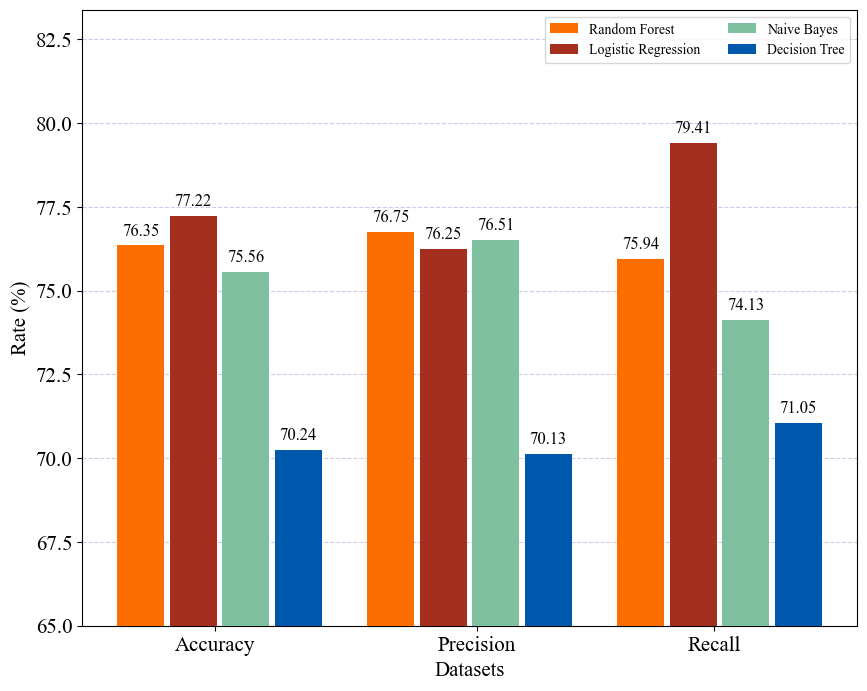

In [130]:
y1 = [round(rf_accuracy*100,2), round(rf_precision*100,2), round(rf_recall*100,2)]
y2 = [round(logistic_accuracy*100,2), round(logistic_precision*100,2), round(logistic_recall*100,2)]
y3 = [round(nb_accuracy*100,2), round(nb_precision*100,2), round(nb_recall*100,2)]
y4 = [round(dt_accuracy*100,2), round(dt_precision*100,2), round(dt_recall*100,2)]

x = ['Accuracy', 'Precision', 'Recall']
x_len = np.arange(len(x))
total_width, n = 1.0, 3
width = 0.21
xticks = x_len - (total_width - width) / 2
plt.figure(figsize=(10, 8))

ax = plt.axes()
plt.grid(axis="y", c='#d2c9eb', linestyle = '--',zorder=0)
plt.bar(xticks, y1, width=0.9*width, label="Random Forest", color="#fd6e00",edgecolor='black',linewidth = 0,  zorder=10)
plt.bar(xticks + width, y2, width=0.9*width, label="Logistic Regression", color="#a42f1f",edgecolor='black',linewidth = 0, zorder=10)
plt.bar(xticks + width*2, y3, width=0.9*width, label="Naive Bayes", color="#7fc0a1",edgecolor='black',linewidth = 0, zorder=10)
plt.bar(xticks + width*3, y4, width=0.9*width, label="Decision Tree", color="#0058ad",edgecolor='black',linewidth = 0, zorder=10)

plt.text(xticks[0], y1[0] + 0.3, y1[0], ha='center',fontproperties='Times New Roman',  fontsize=12,  zorder=10)
plt.text(xticks[1], y1[1] + 0.3, y1[1], ha='center', fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2], y1[2] + 0.3, y1[2], ha='center', fontproperties='Times New Roman', fontsize=12,  zorder=10)

plt.text(xticks[0] + width, y2[0] + 0.3, y2[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width, y2[1] + 0.3, y2[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width, y2[2] + 0.3, y2[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.text(xticks[0] + width*2, y3[0] + 0.3, y3[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width*2, y3[1] + 0.3, y3[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width*2, y3[2] + 0.3, y3[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.text(xticks[0] + width*3, y4[0] + 0.3, y4[0], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[1] + width*3, y4[1] + 0.3, y4[1], ha='center',fontproperties='Times New Roman', fontsize=12,  zorder=10)
plt.text(xticks[2] + width*3, y4[2] + 0.3, y4[2], ha='center', fontproperties='Times New Roman',fontsize=12,  zorder=10)

plt.legend(prop={'family' : 'Times New Roman', 'size': 10}, ncol = 2)
x_len = [-0.1,0.95,1.9]
x_len = np.array(x_len)
plt.xticks(x_len, x, fontproperties='Times New Roman',fontsize = 15)
plt.yticks(fontproperties='Times New Roman',fontsize = 15)
plt.ylim(ymin=65)
plt.xlabel("Datasets", fontproperties='Times New Roman',fontsize=15)
plt.ylabel("Rate (%)",fontproperties='Times New Roman', fontsize=15)

plt.show()